# InferSent model testing before applying to the project!

In [150]:
# import stuff
%load_ext autoreload
%autoreload 2
%matplotlib inline

from random import randint

import numpy as np
import torch
import os


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load model

In [151]:
os.path.abspath(".")

'C:\\Users\\Ankit\\Desktop\\T2F-master\\implementation\\networks\\InferSent\\encoder'

In [182]:
from models import InferSent
V = 2
MODEL_PATH = '../encoder/infersent%s.pkl' % V
params_model = {'bsize': 64, 'word_emb_dim': 300, 'enc_lstm_dim': 2048,
                'pool_type': 'max', 'dpout_model': 0.0, 'version': V}
infersent = InferSent(params_model)
infersent.load_state_dict(torch.load(MODEL_PATH))

UnpicklingError: invalid load key, '<'.

In [153]:
W2V_PATH = '../dataset/fastText/crawl-300d-2M-subword.vec'
infersent.set_w2v_path(W2V_PATH)

In [154]:
# Load some sentences
sentences = []
with open('samples.txt') as f:
    for line in f:
        sentences.append(line.strip())
print(len(sentences))

9815


In [155]:
sentences[:5]

['Everyone really likes the newest benefits',
 'The Government Executive articles housed on the website are not able to be searched .',
 'I like him for the most part , but would still enjoy seeing someone beat him .',
 'My favorite restaurants are always at least a hundred miles away from my house .',
 'I know exactly .']

In [156]:
infersent.build_vocab(sentences, tokenize=True)

Found 11246(/11445) words with w2v vectors
Vocab size : 11246


## Encode sentences

In [162]:
# gpu mode : ~1000 sentences/s
# cpu mode : ~75 sentences/s

In [179]:
embedding = infersent.encode(['Animesh is a very good person', 'He is very intelligent'], tokenize=True)


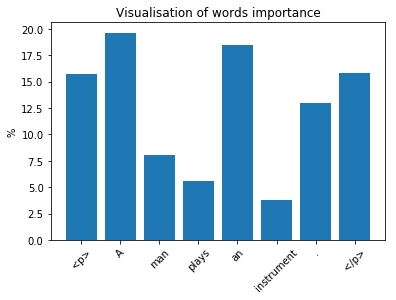

(tensor([[0.0175, 0.0034, 0.0379,  ..., 0.0053, 0.0214, 0.0013]],
        grad_fn=<MaxBackward0>), array([[4, 0, 1, ..., 6, 4, 1]], dtype=int64))

In [180]:
#embedding.shape


## Visualization

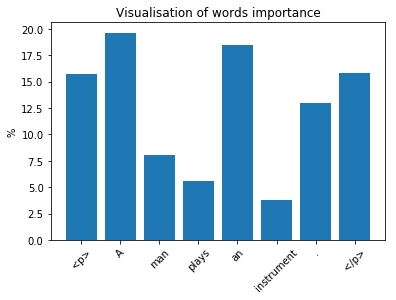

(tensor([[0.0175, 0.0034, 0.0379,  ..., 0.0053, 0.0214, 0.0013]],
        grad_fn=<MaxBackward0>), array([[4, 0, 1, ..., 6, 4, 1]], dtype=int64))

In [181]:
infersent.visualize('A man plays an instrument.', tokenize=True)

### Conclusion: I have seen enough to believe that this model will encode text nicely and work properly for conditioning the image generation